# Pensamiento probabilistico - Variables Continuas
## Funciones de densidad de probabilidad 
### Adrián Vázquez 
#### 20/05/21

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

AttributeError: 'Polygon' object has no property 'normed'

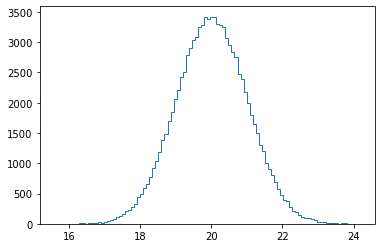

In [11]:
 # 3 distribuciones con un tamaño de n = 100000, con diferentes desviaciones
muestra_stan1 = np.random.normal(20, 1, size=100000)
muestra_stan2 = np.random.normal(20, 3, size=100000)
muestra_stan3 = np.random.normal(20, 10, size=100000)
# Graficando cada distribucion normal
_ = plt.hist(muestra_stan1 , bins=100, normed=True, histtype='step')
_ = sns.hist(muestra_stan2, bins=100, normed=True, histtype='step')
_ = sns.hist(muestra_stan3, bins=100, normed=True, histtype='step')
# Etiquetas
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

In [12]:
# Generate CDFs
x_std1, y_std1  = ecdf(muestra_stan1)
x_std3, y_std3  = ecdf(muestra_stan3)
x_std10, y_std10  = ecdf(muestra_stan10)
# Plot CDFs
sns.set()
_ = plt.plot(x_std1, y_std1, marker = '.', linestyle = 'none')
_ = plt.plot(x_std3, y_std3, marker = '.', linestyle = 'none')
_ = plt.plot(x_std10, y_std10, marker = '.', linestyle = 'none')
# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

NameError: name 'ecdf' is not defined